In [179]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr
with open('test2.txt', 'r') as f:
    data = f.read()
entries = re.split('\n', data)[:-1]
entries_dict = [eval(e) for e in entries]
data = pd.DataFrame(entries_dict)
#data = data.loc[data['step'] < 2560]
data['lb'] = data['mean'] - 1.64 * data['std']/ np.sqrt(data['sample-size'])
data1 = data.loc[data['lr'] == 0.005]
print(data.columns)

Index(['expt', 'lr', 'step', 'seed-data', 'seed-model', 'mean', 'std',
       'sample-size', 'lb'],
      dtype='object')


In [180]:
summary = data1.groupby(['lr', 'expt', 'step']).agg({'lb':['mean', 'std']})

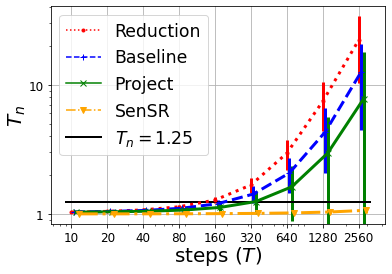

In [181]:
from matplotlib.lines import Line2D
n = np.unique(data['step'])
shift = n/10
lstys = [':', '--', '-', '-.']
markers = ['.', '+', 'x', 'v']
colors = ['red', 'blue', 'green', 'orange']
expts = ['reduction', 'baseline', 'project', 'sensr']
expt_custom_names = ['Reduction', 'Baseline', 'Project', 'SenSR']
custom_sublines = []
for i, (lty, mk, c, expt, e_name) in enumerate(zip(lstys, markers, colors, expts, expt_custom_names)):
    summary1 = summary.iloc[summary.index.get_level_values('expt') == expt]['lb']
    mean, std = summary1['mean'], summary1['std']
    custom_sublines.append(Line2D([0], [0], color = c, linestyle=lty, marker = mk, lw = 3))
    plt.errorbar(n + i * shift, mean, std, color = c, ecolor= c,\
         linestyle = lty, marker = mk, lw = 3)


m = [9, 3200]
plt.plot(m, [1.25]*2, 'k-', lw = 2)
custom_sublines.append(Line2D([0], [0], color = 'black', linestyle='-', marker = ',', lw = 2))
expt_custom_names.append('$T_n=1.25$')
plt.xscale('log')
plt.yscale('log')    
plt.xticks(n, n, fontsize = 'large', rotation = 0)
plt.yticks([1, 10], [1, 10], fontsize = 'large')
plt.ylabel('$T_n$', size = 20, labelpad=0)
plt.xlabel('steps ($T$)', size = 20, labelpad=0)
plt.grid()
plt.legend(custom_sublines, expt_custom_names, loc = 'upper left', fontsize = 'xx-large')
plt.savefig('stopping_time.pdf', bbox_inches='tight')

In [182]:
np.unique(data['lr'])

array([0.0005, 0.002 , 0.005 ])

In [183]:
data2 = data.loc[data['expt'] == 'project']
data2 = data2.loc[data2['lr'] == 0.005]
data2 = data2.loc[data2['step'] == 640]

In [184]:
data2

,expt,lr,step,seed-data,seed-model,mean,std,sample-size,lb
834,project,0.005,640,98539,77708,2.557399,1.999844,199,2.324904
861,project,0.005,640,5192,98047,3.467195,2.752048,200,3.148052
888,project,0.005,640,50057,73349,1.066305,0.062924,198,1.058971
915,project,0.005,640,21440,98448,1.136275,0.126968,200,1.121551
942,project,0.005,640,20609,49100,1.355618,0.411282,199,1.307804
969,project,0.005,640,7751,43757,1.409296,0.557301,198,1.344343
996,project,0.005,640,31228,36230,1.077214,0.074920,199,1.068504
1023,project,0.005,640,97561,21758,1.413310,0.453998,198,1.360397
1050,project,0.005,640,45413,35730,2.680025,1.974741,198,2.449869
1077,project,0.005,640,51668,64395,1.129486,0.149377,199,1.112120


In [185]:
T = [500, 200, 20, 50]
means = []
Ts = []
for steps in T: 
    ratios = np.load(f'./ratios/ratios_T_{steps}.npy')
    for _ in range(20000):
        means.append(np.mean(np.random.choice(ratios, (200, ))))
        Ts.append(steps)
df = pd.DataFrame({'steps ($T$)': Ts, 'mean (sample size 200)': means})
df

,steps ($T$),mean (sample size 200)
0,500,1.049139
1,500,1.049164
2,500,1.046193
3,500,1.047523
4,500,1.048356
...,...,...
79995,50,1.012129
79996,50,1.011280
79997,50,1.012642
79998,50,1.011746


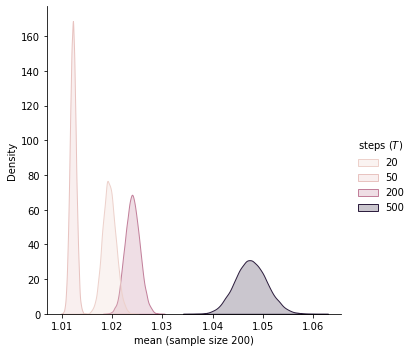

In [186]:
import seaborn as sns
sns_plot = sns.displot(data = df, x='mean (sample size 200)', hue='steps ($T$)',  kind='kde', fill = True)
sns_plot.savefig('normal.pdf')